In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [560]:
apptrainOG=pd.read_csv("application_train.csv")
apptrain=pd.read_csv("modedapptrain.csv")
bureau=pd.read_csv("bureau.csv")
bbal=pd.read_csv("bureau_balance.csv")
ccbal=pd.read_csv("credit_card_balance.csv")
innpay=pd.read_csv("installments_payments.csv")
POS=pd.read_csv("POS_CASH_balance.csv")
old=pd.read_csv("previous_application.csv")

__Preparing data__

In [ ]:
#no use remove
'''apptrain["Gender"]=""
apptrain["OwnCar"]=""
apptrain["OwnRealty"]=""'''

In [ ]:
#takes lot of time
'''for row_index,row in apptrain.iterrows():
    if row["CODE_GENDER"]=='M':
        apptrain.loc[row_index,"CODE_GENDER"]=1
    elif row["CODE_GENDER"]=='F':
        apptrain.loc[row_index,"CODE_GENDER"]=0'''

'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_CAR"]=='Y':
        apptrain.loc[row_index,"OwnCar"]=1
    elif row["FLAG_OWN_CAR"]=='N':
        apptrain.loc[row_index,"OwnCar"]=0'''

'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_REALTY"]=='Y':
        apptrain.loc[row_index,"OwnRealty"]=1
    elif row["FLAG_OWN_REALTY"]=='N':
        apptrain.loc[row_index,"OwnRealty"]=0'''

In [561]:
apptrain.CODE_GENDER[apptrain.CODE_GENDER == 'M'] = 1
apptrain.CODE_GENDER[apptrain.CODE_GENDER == 'F'] = 0
apptrain.CODE_GENDER[apptrain.CODE_GENDER == 'XNA'] = 1

D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#gives XNA error
'''gender={'M':1,'F':0}

apptrain.CODE_GENDER = [gender[item] for item in apptrain.CODE_GENDER]'''

In [592]:
car={'Y':1,'N':0}
apptrain.FLAG_OWN_CAR = [car[item] for item in apptrain.FLAG_OWN_CAR]

In [562]:
realty={'Y':1,'N':0}
apptrain.FLAG_OWN_REALTY = [realty[item] for item in apptrain.FLAG_OWN_REALTY]

In [ ]:
apptrain["NAME_HOUSING_TYPE"].unique()

In [563]:
housing={'House / apartment' : 1,'Rented apartment' : 2,'With parents' : 3,
'Municipal apartment' : 4,'Office apartment' :5,'Co-op apartment' : 6}

apptrain.NAME_HOUSING_TYPE = [housing[item] for item in apptrain.NAME_HOUSING_TYPE]

In [41]:
apptrain["NAME_INCOME_TYPE"].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [564]:
income={'Working' : 1,'State servant' : 2,'Commercial associate' : 3,'Pensioner' : 4,
        'Unemployed' :5,'Student' : 6,'Businessman' : 7,'Maternity leave' : 8}

apptrain.NAME_INCOME_TYPE = [income[item] for item in apptrain.NAME_INCOME_TYPE]

In [60]:
apptrain["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [565]:
education={'Secondary / secondary special' : 1,'Higher education' : 2,'Incomplete higher' : 3,
           'Lower secondary' : 4,'Academic degree' : 5}

apptrain.NAME_EDUCATION_TYPE = [education[item] for item in apptrain.NAME_EDUCATION_TYPE]

In [82]:
apptrain['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [566]:
contract={'Cash loans' : 1,'Revolving loans' : 2}

apptrain.NAME_CONTRACT_TYPE = [contract[item] for item in apptrain.NAME_CONTRACT_TYPE]

In [85]:
apptrain['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
#gives error for null values
'''suittype={'Unaccompanied' : 1,'Family' : 2,'Spouse, partner' : 3,'Children' : 4,'Other_A' :5,'Other_B' : 6,
            'Group of people' : 7}

apptrain.NAME_TYPE_SUITE = [suittype[item] for item in apptrain.NAME_TYPE_SUITE]'''

In [567]:
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE.isnull()] = 0
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Unaccompanied'] = 1
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Family'] = 2
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Spouse, partner'] = 3
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Children'] = 4
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Other_A'] = 5
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Other_B'] = 6
apptrain.NAME_TYPE_SUITE[apptrain.NAME_TYPE_SUITE == 'Group of people'] = 7

D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\product\Anaconda\lib\site-packa

In [261]:
dictCol=splitColsByParts(apptrain,10)

In [257]:
apptrain.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
occupation={'Laborers':1, 'Core staff':2, 'Accountants':3, 'Managers':4,
       'Drivers':5, 'Sales staff':6, 'Cleaning staff':7, 'Cooking staff':8,
       'Private service staff':9, 'Medicine staff':10, 'Security staff':11,
       'High skill tech staff':12, 'Waiters/barmen staff':13,
       'Low-skill Laborers':14, 'Realty agents':15, 'Secretaries':16, 'IT staff':17,
       'HR staff':18}

In [568]:
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE.isnull()] = 0
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Laborers'] = 1
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Core staff'] = 2
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Accountants'] = 3
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Managers'] = 4
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Drivers'] = 5
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Sales staff'] = 6
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Cleaning staff'] = 7
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Cooking staff'] = 8
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Private service staff'] = 9
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Medicine staff'] = 10
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Security staff'] = 11
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'High skill tech staff'] = 12
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Waiters/barmen staff'] = 13
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Low-skill Laborers'] = 14
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Realty agents'] = 15
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'Secretaries'] = 16
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'IT staff'] = 17
apptrain.OCCUPATION_TYPE[apptrain.OCCUPATION_TYPE == 'HR staff'] = 18

D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\product\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\product\Anaconda\lib\site-packa

In [265]:
apptrain.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [569]:
familystatus={'Single / not married':1, 'Married':2, 'Civil marriage':3, 'Widow':4,
       'Separated':5, 'Unknown':0}

apptrain.NAME_FAMILY_STATUS = [familystatus[item] for item in apptrain.NAME_FAMILY_STATUS]

In [268]:
apptrain.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [570]:
day={'WEDNESDAY':4, 'MONDAY':2, 'THURSDAY':5, 'SUNDAY':1, 'SATURDAY':7, 'FRIDAY':6,
       'TUESDAY':3}
apptrain.WEEKDAY_APPR_PROCESS_START=[day[item] for item in apptrain.WEEKDAY_APPR_PROCESS_START]

In [433]:
org=apptrainOG.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [284]:
organization={}
num=1
for item in org:
    organization[item]=num
    num+=1

In [571]:
apptrain.ORGANIZATION_TYPE=[organization[item] for item in apptrain.ORGANIZATION_TYPE]

,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0
1,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0


In [297]:
(apptrain.WALLSMATERIAL_MODE.isnull().sum()/apptrain.shape[0])*100

50.8407829313423

In [572]:
apptrain["EXT_SOURCE_1"].fillna(0,inplace=True)
apptrain["EXT_SOURCE_2"].fillna(0,inplace=True)
apptrain["EXT_SOURCE_3"].fillna(0,inplace=True)

In [573]:
apptrain["AMT_GOODS_PRICE"].fillna(0,inplace=True)
apptrain["AMT_ANNUITY"].fillna(0,inplace=True)

In [575]:
(((apptrain.isnull()).sum().sort_values(ascending=False))/apptrain.shape[0])*100

COMMONAREA_MODE                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MEDI                69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MEDI          68.354953
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_MEDI                 67.848630
FLOORSMIN_AVG                  67.848630
FLOORSMIN_MODE                 67.848630
YEARS_BUILD_MEDI               66.497784
YEARS_BUILD_AVG                66.497784
YEARS_BUILD_MODE               66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MODE                  59.376738
LANDAREA_MEDI                  59.376738
LANDAREA_AVG                   59.376738
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
NONLIVINGAREA_AVG              55.179164
NONLIVINGAREA_ME

In [576]:
s=((apptrain.isnull().sum()/apptrain.shape[0])*100).sort_values(ascending=False)

In [577]:
d=pd.DataFrame()

In [578]:
d["colnames"]=""
d["percent"]=""
d.colnames=s.index
d.percent=s.values

In [579]:
a=d[d["percent"]>50]

In [580]:
a

,colnames,percent
0,COMMONAREA_MODE,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MEDI,69.872297
3,NONLIVINGAPARTMENTS_AVG,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MEDI,68.354953
8,LIVINGAPARTMENTS_MODE,68.354953
9,LIVINGAPARTMENTS_AVG,68.354953


In [595]:
apptrain[apptrain.COMMONAREA_MODE.isnull() & apptrain.TARGET==1].count()

SK_ID_CURR                    18423
TARGET                        18423
NAME_CONTRACT_TYPE            18423
CODE_GENDER                   18423
FLAG_OWN_CAR                  18423
FLAG_OWN_REALTY               18423
CNT_CHILDREN                  18423
AMT_INCOME_TOTAL              18423
AMT_CREDIT                    18423
AMT_ANNUITY                   18423
AMT_GOODS_PRICE               18423
NAME_TYPE_SUITE               18423
NAME_INCOME_TYPE              18423
NAME_EDUCATION_TYPE           18423
NAME_FAMILY_STATUS            18423
NAME_HOUSING_TYPE             18423
REGION_POPULATION_RELATIVE    18423
DAYS_BIRTH                    18423
DAYS_EMPLOYED                 18423
DAYS_REGISTRATION             18423
DAYS_ID_PUBLISH               18423
OWN_CAR_AGE                    5664
FLAG_MOBIL                    18423
FLAG_EMP_PHONE                18423
FLAG_WORK_PHONE               18423
FLAG_CONT_MOBILE              18423
FLAG_PHONE                    18423
FLAG_EMAIL                  

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
23,100027,0,1,0,0,1,0,83250.0,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
65,100077,0,1,1,0,1,0,180000.0,1256400.0,40657.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
105,100124,0,1,1,0,1,0,225000.0,448272.0,28647.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
130,100152,0,1,0,0,1,0,157500.0,254412.0,9720.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
140,100162,0,1,0,0,1,0,112500.0,547344.0,18216.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
161,100190,0,1,1,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
194,100226,0,2,0,0,0,2,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
240,100279,0,1,1,0,1,0,180000.0,254700.0,16407.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
323,100371,0,1,0,1,1,1,450000.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
332,100380,0,1,0,0,1,0,630000.0,900000.0,57519.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
apptrain.drop(columns=a["colnames"],inplace=True)

In [484]:
apptrain.drop(columns=["Gender","OwnCar","OwnRealty"],inplace=True)

In [462]:
apptrain["OCCUPATION_TYPE"].fillna(0,inplace=True)

In [446]:
apptrain.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307507.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,1.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.341648,0.340108,0.693673
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.474263,0.473746,0.460968
min,100002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,456255.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,1.000000,1.000000,1.000000


In [461]:
apptrain["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)
apptrain["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0,inplace=True)

In [472]:
apptrain.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
dicto={}
dicto=splitColsByParts(apptrain,4)

In [483]:
dicto[1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
0,100002,1,1,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1.0,1,1,1,1,0.018801,-9461,-637
1,100003,0,1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,2.0,2,2,2,1,0.003541,-16765,-1188
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1.0,1,1,1,1,0.010032,-19046,-225
3,100006,0,1,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.0,1,1,3,1,0.008019,-19005,-3039
4,100007,0,1,1,0,1,0,121500.0,513000.0,21865.5,513000.0,1.0,1,1,1,1,0.028663,-19932,-3038


In [ ]:
apptrain

In [ ]:
apptrain.dropna(inplace=True)

In [ ]:
apptrain.drop(columns=["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [485]:
#apptrain.to_csv('modedapptrain.csv',sep=',',encoding='utf-8')

__Analyzing Data - GRAPHS__

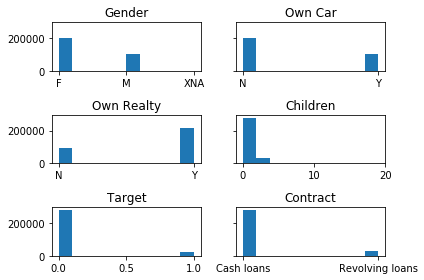

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.hist(apptrain["CODE_GENDER"], label="Gender")
ax0.set_title('Gender')
ax1.hist(apptrain["FLAG_OWN_CAR"], label="Own Car")
ax1.set_title('Own Car')
ax2.hist(apptrain["FLAG_OWN_REALTY"], label="Own Realty")
ax2.set_title('Own Realty')
ax3.hist(apptrain["CNT_CHILDREN"], label="Children")
ax3.set_title('Children')
ax4.hist(apptrain["TARGET"], label="Target")
ax4.set_title('Target')
ax5.hist(apptrain["NAME_CONTRACT_TYPE"], label="Contract")
ax5.set_title('Contract')
fig.tight_layout()
plt.show()

In [ ]:
#sns.heatmap(apptrain.iloc[1:].isnull(),vmin=0,vmax=2,xticklabels=True,yticklabels=True)

In [ ]:
sns.heatmap(apptrain.head(200000).isnull(),vmin=0,vmax=2)

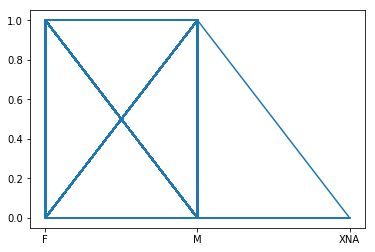

In [4]:
plt.plot(apptrain["CODE_GENDER"],apptrain["TARGET"])

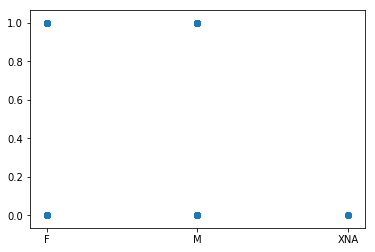

In [5]:
plt.scatter(apptrain["CODE_GENDER"],apptrain["TARGET"])

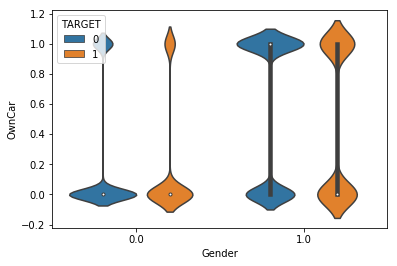

In [13]:
sns.violinplot(x=apptrain["Gender"],y=apptrain["OwnCar"],hue=apptrain["TARGET"])

In [4]:
apptrain1=apptrain[["Gender","TARGET","OwnCar","OwnRealty"]]

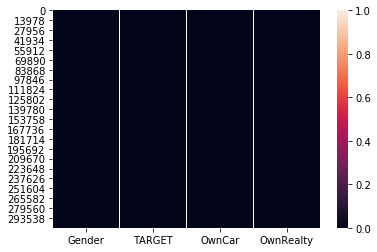

In [37]:
sns.heatmap(apptrain1.isnull(),vmin=0,vmax=1)

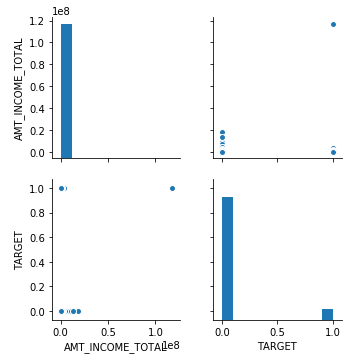

In [7]:
sns.pairplot(data=apptrain[["AMT_INCOME_TOTAL","TARGET"]])
#sns.(x="total_bill", y="tip", data=tips);

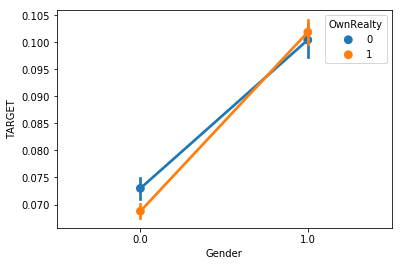

In [12]:
sns.pointplot(data=apptrain1, x="Gender", y="TARGET",hue="OwnRealty")

In [ ]:
sns.factorplot(data=apptrain1, x="Gender", y="TARGET",hue="OwnRealty")

In [ ]:
apptrain.drop(columns=["Unnamed: 0","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY"],axis=1,inplace=True)

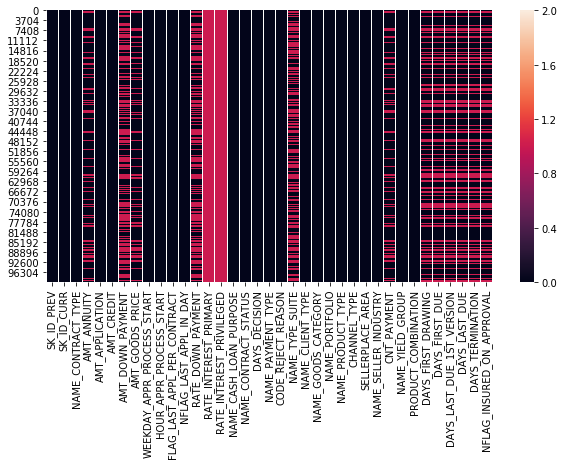

In [64]:
fig=plt.figure(figsize=(10, 5))
sns.heatmap(old.head(100000).isnull(),vmin=0,vmax=2)

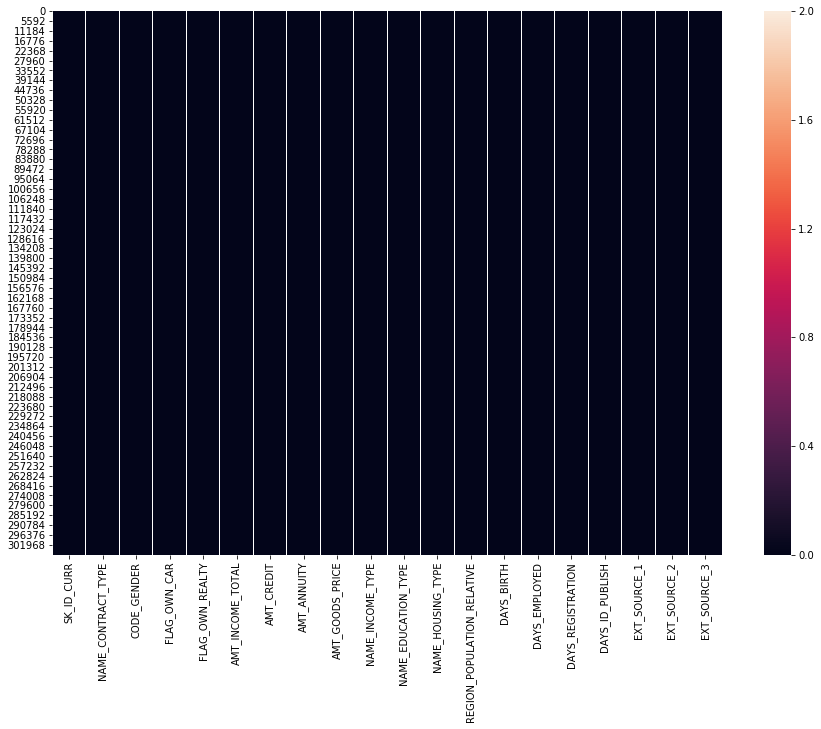

In [136]:
fig=plt.figure(figsize=(15, 10))
sns.heatmap(X.isnull(),vmin=0,vmax=2)

In [109]:
apptrain["SK_ID_CURR"].count()

307511

In [128]:
X["EXT_SOURCE_1"].fillna(0,inplace=True)

D:\product\Anaconda\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [130]:
X["EXT_SOURCE_2"].fillna(0,inplace=True)

D:\product\Anaconda\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [131]:
X["EXT_SOURCE_3"].fillna(0,inplace=True)

D:\product\Anaconda\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [127]:
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,1,0,1,202500.0,406597.5,24700.5,351000.0,1,1,1,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376
1,100003,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,2,2,1,0.003541,-16765,-1188,-1186.0,-291,0.311267,0.622246,NaN
2,100004,2,1,1,1,67500.0,135000.0,6750.0,135000.0,1,1,1,0.010032,-19046,-225,-4260.0,-2531,NaN,0.555912,0.729567
3,100006,1,0,0,1,135000.0,312682.5,29686.5,297000.0,1,1,1,0.008019,-19005,-3039,-9833.0,-2437,NaN,0.650442,NaN
4,100007,1,1,0,1,121500.0,513000.0,21865.5,513000.0,1,1,1,0.028663,-19932,-3038,-4311.0,-3458,NaN,0.322738,NaN


In [129]:
X.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000
mean,278180.518577,1.095213,0.340108,0.693673,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,2.077347,1.349649,1.273772,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.219024,5.143927e-01,0.510853
std,102790.175348,0.293509,0.473746,0.460968,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,1.210927,0.612447,0.829839,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.285374,1.910602e-01,0.194844
min,100002.000000,1.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,1.000000,1.000000,1.000000,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,8.173617e-08,0.000527
25%,189145.500000,1.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,1.000000,1.000000,1.000000,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,0.000000,3.924574e-01,0.370650
50%,278202.000000,1.000000,0.000000,1.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,1.000000,1.000000,1.000000,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.000000,5.659614e-01,0.535276
75%,367142.500000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,3.000000,2.000000,1.000000,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,0.456261,6.636171e-01,0.669057
max,456255.000000,2.000000,1.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,8.000000,5.000000,6.000000,0.072508,-7489.000000,365243.000000,0.000000,0.000000,0.962693,8.549997e-01,0.896010


__Analyzing Data - DataFrames__

In [7]:
old.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [59]:
apptrain.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307507.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.341648,0.340108,0.693673
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.474263,0.473746,0.460968
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,1.000000,1.000000,1.000000


In [428]:
def splitColsByParts(df,n):
    d = {}
    count=df.shape[1]
    parts=int(count/n)
    remains=int(count%n)
    fro=0
    to=0
    for one in range(1,n+1):
        if remains>0 and one==n:
            to=parts*one+remains
        else:
            to=parts*one
        
        '''print("from "+str(fro))
        print("to "+ str(to))'''
        d[one] =pd.DataFrame()
        d[one]=df.iloc[:,fro:to]
        fro=to
    return d

In [429]:
dicto={}
dicto=splitColsByParts(apptrain,4)

In [254]:
dicto[1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,1,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,1,1,0,1,1,0,Laborers,1.0,2
1,100003,0,1,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,1,1,0,1,1,0,Core staff,2.0,1
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,...,26.0,1,1,1,1,1,0,Laborers,1.0,2
3,100006,0,1,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,1,1,0,1,0,0,Laborers,2.0,2
4,100007,0,1,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,1,1,0,1,0,0,Core staff,1.0,2


In [ ]:
apptrain["OCCUPATION_TYPE"].isnull().sum()

In [411]:
nullocc=apptrain[apptrain["OCCUPATION_TYPE"].isnull()]

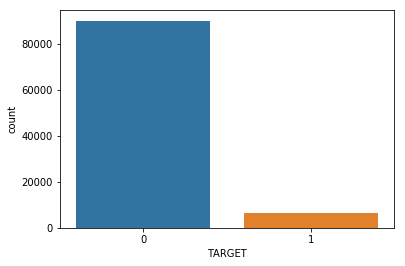

In [414]:
sns.countplot(x=nullocc["TARGET"],data=nullocc)

In [419]:
nullocc[nullocc["TARGET"]==1].count()

SK_ID_CURR                    6278
TARGET                        6278
NAME_CONTRACT_TYPE            6278
CODE_GENDER                   6278
FLAG_OWN_CAR                  6278
FLAG_OWN_REALTY               6278
CNT_CHILDREN                  6278
AMT_INCOME_TOTAL              6278
AMT_CREDIT                    6278
AMT_ANNUITY                   6278
AMT_GOODS_PRICE               6274
NAME_TYPE_SUITE               6260
NAME_INCOME_TYPE              6278
NAME_EDUCATION_TYPE           6278
NAME_FAMILY_STATUS            6278
NAME_HOUSING_TYPE             6278
REGION_POPULATION_RELATIVE    6278
DAYS_BIRTH                    6278
DAYS_EMPLOYED                 6278
DAYS_REGISTRATION             6278
DAYS_ID_PUBLISH               6278
OWN_CAR_AGE                   1514
FLAG_MOBIL                    6278
FLAG_EMP_PHONE                6278
FLAG_WORK_PHONE               6278
FLAG_CONT_MOBILE              6278
FLAG_PHONE                    6278
FLAG_EMAIL                    6278
OCCUPATION_TYPE     

In [473]:
apptrainOG.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_AVG        213514
FONDKAPREMONT_MODE             210295
LIVINGAPARTMENTS_MEDI          210199
LIVINGAPARTMENTS_MODE          210199
LIVINGAPARTMENTS_AVG           210199
FLOORSMIN_MEDI                 208642
FLOORSMIN_MODE                 208642
FLOORSMIN_AVG                  208642
YEARS_BUILD_MEDI               204488
YEARS_BUILD_AVG                204488
YEARS_BUILD_MODE               204488
OWN_CAR_AGE                    202929
LANDAREA_MODE                  182590
LANDAREA_AVG                   182590
LANDAREA_MEDI                  182590
BASEMENTAREA_MEDI              179943
BASEMENTAREA_AVG               179943
BASEMENTAREA_MODE              179943
EXT_SOURCE_1                   173378
NONLIVINGAREA_MEDI             169682
NONLIVINGAREA_AVG              169682
NONLIVINGARE

In [396]:
newapptr.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
Gender                             4
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
OwnRealty                          0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
DAYS_ID_PUBLISH                    0
FLAG_PHONE                         0
FLAG_EMAIL                         0
FLAG_CONT_MOBILE                   0
N

In [400]:
apptrainOG.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [323]:
apptrain_nullvalues=pd.DataFrame(apptrain_nullvalues)

# Rough Work

In [2]:
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

In [5]:
data.shape

(1000, 100)

In [8]:
labels.unique

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

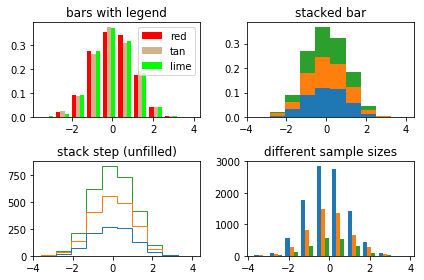

In [12]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [69]:
count=apptrain.shape[0]


In [88]:
print(count/100)
print(count%100)

3075.11
11


In [84]:
limit=int(count/100)+int(count%100)

In [85]:
limit

3086

In [21]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [15]:
apptrain[10:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
12,100016,0,Cash loans,F,N,Y,0,67500.000,80865.0,5881.5,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
13,100017,0,Cash loans,M,Y,N,1,225000.000,918468.0,28966.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,32778.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
15,100019,0,Cash loans,M,Y,Y,0,157500.000,299772.0,20160.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
16,100020,0,Cash loans,M,N,N,0,108000.000,509602.5,26149.5,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
17,100021,0,Revolving loans,F,N,Y,1,81000.000,270000.0,13500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
18,100022,0,Revolving loans,F,N,Y,0,112500.000,157500.0,7875.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19,100023,0,Cash loans,F,N,Y,1,90000.000,544491.0,17563.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1


In [18]:
mydict={}

In [28]:
mydict=splitbyRows(apptrain,150000)

In [ ]:
mydict[3]

In [15]:
apptrain.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0,0


In [26]:
for i in range(1,10+1):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [11]:
    d = {}
    df=apptrain
    n=50000
    count=df.shape[0]
    print("count "+str(count))
    parts=int(count/n)
    print("parts "+ str(parts))
    remains=int(count%n)
    if remains>1:
        limit=parts+1
    else:
        limit=parts    
    fro=0
    to=0
    print("Limit"+str(limit))
    for one in range(1,limit+1):
        print(one)
        to=one*n
        print("to "+ str(to))
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
        print("fro"+str(fro))
        print("********")
    return d

count 307511
parts 6
Limit7
1
to 50000
fro50000
********
2
to 100000
fro100000
********
3
to 150000
fro150000
********
4
to 200000
fro200000
********
5
to 250000
fro250000
********
6
to 300000
fro300000
********
7
to 350000
fro350000
********


SyntaxError: 'return' outside function (<ipython-input-11-f1380a8fc64a>, line 26)

In [27]:
count/2

153755.5

In [53]:
df=apptrain
n=4
d = {}
count=df.shape[0]
print("count "+str(count))
parts=int(count/n)
print("parts "+ str(parts))
remains=int(count%n)
print("remains "+ str(remains))
'''if remains!=0:
    limit=parts+1
else:
    limit=parts '''   
fro=0
to=0
print("     ")
print("Limit"+str(limit))
for one in range(1,n+1):
    if remains>0 and one==n:
        to=parts*one+remains
    else:
        to=parts*one
    
    print("fro"+str(fro))
    print("to "+ str(to))
    d[one] =pd.DataFrame()
    d[one]=df[fro:to]
    fro=to
    
    print("********")

count 307511
parts 76877
remains 3
     
Limit7
fro0
to 76877
********
fro76877
to 153754
********
fro153754
to 230631
********
fro230631
to 307511
********


In [41]:
for one in range(1,4+1):
    
    if one==n:
        print("last"+ str(one))
    else:
        print(one)
    

1
2
3
last4


In [26]:
list(apptrain["NAME_CONTRACT_TYPE"].unique())

['Cash loans', 'Revolving loans']

In [239]:
apptrain.shape[1]

125

In [236]:
apptrain.iloc[:,30:50].head()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG
0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00
1,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08
2,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
def splitColsByParts(df,n):
    d = {}
    count=df.shape[1]
    parts=int(count/n)
    remains=int(count%n)
    fro=0
    to=0
    for one in range(1,n+1):
        if remains>0 and one==n:
            to=parts*one+remains
        else:
            to=parts*one
        
        print("fro"+str(fro))
        print("to "+ str(to))
        d[one] =pd.DataFrame()
        d[one]=df.iloc[:,fro:to]
        fro=to
    return d

In [241]:
dicto={}

dicto=splitColsByParts(apptrain,4)

fro0
to 31
fro31
to 62
fro62
to 93
fro93
to 125


In [248]:
dicto[1].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,1,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,1,1,0,1,1,0,Laborers,1.0,2
1,100003,0,1,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,1,1,0,1,1,0,Core staff,2.0,1
2,100004,0,2,1,1,1,0,67500.0,135000.0,6750.0,...,26.0,1,1,1,1,1,0,Laborers,1.0,2
3,100006,0,1,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,1,1,0,1,0,0,Laborers,2.0,2
4,100007,0,1,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,1,1,0,1,0,0,Core staff,1.0,2


In [548]:
apptrain.fillna(0,inplace=True)

CHAL BAGHU

# Main Program 

In [21]:
def splitRowsbySize(df,n):
    d = {}
    count=df.shape[0]
    parts=int(count/n)
    remains=int(count%n)
    if remains>1:
        limit=parts+1
    else:
        limit=parts    
    fro=0
    to=0
    for one in range(1,limit+1):
        to=one*n
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
    return d    

In [55]:
def splitRowsByParts(df,n):
    d = {}
    count=df.shape[0]
    parts=int(count/n)
    remains=int(count%n)
    fro=0
    to=0
    for one in range(1,n+1):
        if remains>0 and one==n:
            to=parts*one+remains
        else:
            to=parts*one
        
        print("fro"+str(fro))
        print("to "+ str(to))
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
    return d



In [ ]:
def splitColsByParts(df,n):
    d = {}
    count=df.shape[1]
    parts=int(count/n)
    remains=int(count%n)
    fro=0
    to=0
    for one in range(1,n+1):
        if remains>0 and one==n:
            to=parts*one+remains
        else:
            to=parts*one
        
        '''print("from "+str(fro))
        print("to "+ str(to))'''
        d[one] =pd.DataFrame()
        d[one]=df.iloc[:,fro:to]
        fro=to
    return d

# part1

In [95]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

In [96]:
from sklearn.linear_model import SGDClassifier

In [537]:
X=apptrain[["SK_ID_CURR"
,"NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"AMT_INCOME_TOTAL"
,"AMT_CREDIT"
,"AMT_ANNUITY"
,"AMT_GOODS_PRICE"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_HOUSING_TYPE"
,"REGION_POPULATION_RELATIVE"
,"DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"EXT_SOURCE_2"
,"EXT_SOURCE_3"]]

In [538]:
y=apptrain["TARGET"]

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [540]:
clf = SGDClassifier(loss="hinge", penalty="l2")

In [ ]:
X[X["NAME_TYPE_SUITE"]=='XNA'].head()

In [541]:
X.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                  0
AMT_GOODS_PRICE               0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
EXT_SOURCE_2                  0
NAME_EDUCATION_TYPE           0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
SK_ID_CURR                    0
dtype: int64

In [542]:
clf.fit(X_train, y_train)

D:\product\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [543]:
prediction=clf.predict(X_test)

In [544]:
from sklearn.metrics import accuracy_score

In [545]:
accuracy_score(y_test, prediction)

0.7319445402497068

In [170]:
prediction.shape

(5805,)

In [172]:
X_test.count()

SK_ID_CURR                    5805
NAME_CONTRACT_TYPE            5805
CODE_GENDER                   5805
FLAG_OWN_CAR                  5805
FLAG_OWN_REALTY               5805
AMT_INCOME_TOTAL              5805
AMT_CREDIT                    5805
AMT_ANNUITY                   5805
AMT_GOODS_PRICE               5805
NAME_INCOME_TYPE              5805
NAME_EDUCATION_TYPE           5805
NAME_HOUSING_TYPE             5805
REGION_POPULATION_RELATIVE    5805
DAYS_BIRTH                    5805
DAYS_EMPLOYED                 5805
DAYS_REGISTRATION             5805
DAYS_ID_PUBLISH               5805
EXT_SOURCE_1                  5805
EXT_SOURCE_2                  5805
EXT_SOURCE_3                  5805
dtype: int64

# part2

In [201]:
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA,IncrementalPCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [549]:
pca2 = PCA(n_components=20)
X_pca2 = pca2.fit_transform(apptrain)

In [550]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.33, random_state=42)

In [551]:
clf2 = SGDClassifier(loss="hinge", penalty="l2")
clf2.fit(X_train2, y_train2)

D:\product\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [552]:
prediction2=clf2.predict(X_test2)

In [553]:
accuracy_score(y_test2, prediction2)

0.431951438228599

In [229]:
apptrain.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307507.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,1.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.341648,0.340108,0.693673
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.474263,0.473746,0.460968
min,100002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,456255.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,1.000000,1.000000,1.000000


# part3

In [555]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(apptrain.drop("TARGET",axis=1), apptrain["TARGET"], test_size=0.33, random_state=42)

In [556]:
clf3 = SGDClassifier(loss="hinge", penalty="l2")

In [557]:
clf3.fit(X_train3, y_train3)

D:\product\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [558]:
prediction3=clf3.predict(X_test3)

In [544]:
from sklearn.metrics import accuracy_score

In [559]:
accuracy_score(y_test3, prediction3)

0.8181692764020142